# Laboratorio Final
Riveros Guevara Hipolito Arturo
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$\newcommand{\braket}[2]{\langle #1|#2\rangle} $

## Clase 1-2:

1.- ¿Cuál es el vector de estado de un sistema compuesto por 3 qubits , estando los qubits individuales(e independientes) en los estados  $|+\rangle $ , $|+\rangle $,$| -\rangle $,? Luego hacer las mediciones parciales para el qubit central, repetir lo mismo con qiskit.


$\textit{Solucion:}$

El estado del sistema formado por los 3 qubits estará dado por:

$\ket{\psi} = \ket{+} \otimes \ket{+}  \otimes \ket{-}$

De las definiciones de $\ket{+}$ y $\ket{-}$ y de las reglas del producto tensorial:

\begin{align}
\ket{\psi}&=\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})\otimes\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})\otimes\frac{1}{\sqrt{2}}(\ket{0}-\ket{1})\\
\ket{\psi}&=\frac{1}{\sqrt{2^{3}}}(\ket{00}+\ket{01}+\ket{10}+\ket{11})\otimes (\ket{0}-\ket{1})\\
\ket{\psi}&=\frac{1}{\sqrt{2^{3}}}(\ket{000}+\ket{010}+\ket{100}+\ket{110}-\ket{001}-\ket{011}-\ket{101}-\ket{111})\\
\end{align}

Hallando las probabilidades del qubit central:

\begin{align}
\ket{\psi}&=\frac{1}{\sqrt{2^{3}}}(\ket{000}+\ket{010}+\ket{100}+\ket{110}-\ket{001}-\ket{011}-\ket{101}-\ket{111})\\
&=\underbrace{\frac{1}{\sqrt{2^{3}}} \left(\ket{000}+\ket{100}-\ket{001}-\ket{101} \right)}_{\text{Subestado con qubit central en | 0 > }}+\underbrace{\frac{1}{\sqrt{2^{3}}}(\ket{010}+\ket{110}-\ket{011}-\ket{111})}_{\text{Subestado con qubit central en | 1 > }} \\
\end{align}

Entonces las probabilidades parciales estarán dadas por :

\begin{align}
P_{0}=\left(\frac{1}{\sqrt{2^{3}}} \right)^{2}( \left\langle 000|000  \right\rangle + \left\langle 100|100  \right\rangle + \left\langle 001|001  \right\rangle + 
\left\langle 101|101  \right\rangle ) = \frac{4}{8} = \frac{1}{2}\\
P_{1}=\left(\frac{1}{\sqrt{2^{3}}} \right)^{2}( \left\langle 010|010  \right\rangle + \left\langle 110|110  \right\rangle + \left\langle 011|011  \right\rangle + 
\left\langle 111|111  \right\rangle ) = \frac{4}{8} = \frac{1}{2}
\end{align}

* Calculo en qiskit

In [8]:
from qiskit.visualization import array_to_latex, plot_state_qsphere
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit,QuantumRegister, ClassicalRegister
import numpy as np
from numpy import pi,sin,cos,exp,outer

Podemos hallar el producto de los 3 estados directamente con el método `.from_label()` ya que son estados conocidos:

In [8]:
Ket_estado = Statevector.from_label('++-')
Ket_estado.draw('latex')

<IPython.core.display.Latex object>

A continuacion hallamos las probabilidades parciales del qubit intermedio (`[1]`) con el método `.probabilities_dict()`

In [14]:
prob=Ket_estado.probabilities_dict([1])
print("Proabilidad de | 0 > =",prob['0'])
print("Proabilidad de | 1 > =",prob['1'])

Proabilidad de | 0 > = 0.4999999999999998
Proabilidad de | 1 > = 0.4999999999999998


2.- ¿Cuántos qubits independientes tiene como mínimo el siguiente sistema?

<center>
<img src="https://raw.githubusercontent.com/tonymilla/QuantumScholars2023/main/imagenes/examen/q_spherequestion.png">

$\textit{Solucion:}$


El sistema no puede estar formado unicamente por 1 o 2 qubits, ya que la totalidad de los estados posibles que se pueden representar en la Q-esfera para ambos casos serían los siguientes:
<center>
<img src="https://github.com/hipito123/Imagenes/blob/main/preg2.png?raw=true">
    
Los cuales no pueden incluir ni representar el estado que se muestra.

En cambio, para un sistema de 3 qubits tenemos los siguientes posibles estados:

<center>
<img src="https://github.com/hipito123/Imagenes/blob/main/kv7tcq0b.png?raw=true">

Por ejemplo, un posible estado que represente el estado pedido podría ser:

In [14]:
Ket_2 = Statevector.from_label('010')+Statevector.from_label('101')
Ket_2.draw('latex')

<IPython.core.display.Latex object>

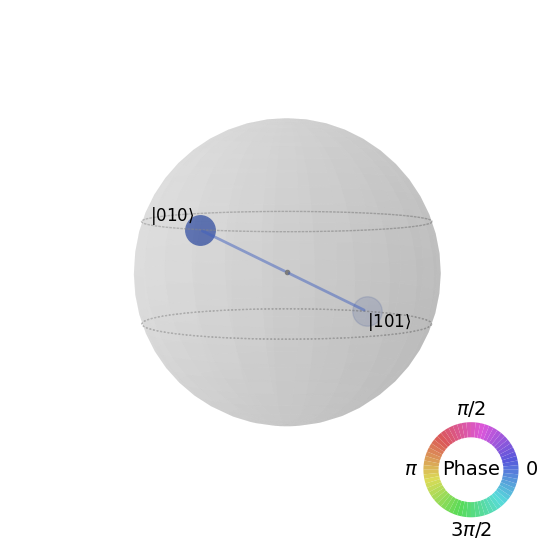

In [15]:
plot_state_qsphere(Ket_2)

En conclusión. serían necesarios como mínimo 3 qubits independientes para representar el sistema dado

3.- ¿Cómo se escribiría en notación de Dirac una compuerta CU3 desarrollalo e implementalo en qiskit para $\theta = \pi$, $\phi = \frac{\pi}{2}$ y $\lambda = \frac{7\pi}{2}$ 

Sabemos que $CU3$ debe cumplir con:

Si $\ket{q_{0}}=\ket{0}$:
$$CU3\ket{q_{0}}\otimes\ket{q_{1}}=\ket{0}\ket{q_{1}}=(\ket{0}\bra{0}\otimes I)\ket{q_{0}}\otimes\ket{q_{1}}$$

Si $\ket{q_{0}}=\ket{1}$:
$$CU3\ket{q_{1}}\otimes\ket{q_{1}}=\ket{1}U3\ket{q_{1}}=(\ket{1} \bra{1}\otimes U3 )\ket{q_{0}}\otimes\ket{q_{1}}$$

Juntando ambos casos obtenemos:

$$CU3\ket{q_{0}}\otimes\ket{q_{1}}=(\ket{0}\bra{0}\otimes I + \ket{1} \bra{1}\otimes U3 )\ket{q_{0}}\otimes\ket{q_{1}}$$

Es decir:

$$CU3=\ket{0}\bra{0}\otimes I + \ket{1} \bra{1}\otimes U3 $$

* Implementación en qiskit

In [9]:
from qiskit.quantum_info.operators import Operator
#Definición de los bra y kets base
bra_0=Operator([1,0])
ket_0=Operator([[1],[0]])
bra_1=Operator([0,1])
ket_1=Operator([[0],[1]])
#Valores de los angulos
theta=pi
phi=pi/2
lamb=7*pi/2

Definimos el operador:

In [10]:
a= cos(theta/2)
b= -exp(complex(0,1)*lamb)*sin(theta/2)
c= exp(complex(0,1)*phi)*sin(theta/2)
d= exp(complex(0,1)*(theta+lamb))*cos(theta/2)

U3= a*outer(ket_0,bra_0) + b*outer(ket_1,bra_0) + c*outer(ket_0,bra_1) + d*outer(bra_1,ket_1)

In [12]:
CU3=outer(outer(ket_0,bra_0),np.array([[1, 0],[0, 1]]))+outer(outer(bra_1,ket_1),U3)

## Clase 4-5

4.- A partir de la relación existente entre la operación (módulo 2) y el operador XOR ($\oplus$). Mostrar:

\begin{align}
\sum_{i=1}^n x_iz_i \pmod 2=x_1z_1\oplus x_2z_2\oplus\cdots\oplus x_nz_n
\end{align}

$\textit{Solucion:}$

Podemos probar fácilmente la siguiente relación para $a,b = \left \{ 0,1 \right \}$:
\begin{equation}
a\oplus b = (a+b)\%2 \hspace{1.5cm} (1)
\end{equation}
Del siguiente modo:

\begin{align}
0\oplus 0 = (0+0)\%2= 0\\
0\oplus 1 = (0+1)\%2= 1\\
1\oplus 0 = (1+0)\%2= 1\\
1\oplus 1 = (1+1)\%2= 0
\end{align}

Luego, probaremos la identidad pedida por induccion matemática:

$\bullet $

Para m=1, tenemos:

$x_1z_1 \pmod 2=x_1z_1$

La cual es una relación trivial, ya que $x_1z_1$ es siempre igual a $0$ o $1$ y su modulo respecto a 2 es igual al mismo número

$\bullet $

Asumiendo que la relación es cierta para $m=n$ :
$$ \left(\sum_{i=1}^n x_iz_i\right) \% 2=x_1z_1\oplus x_2z_2\oplus\cdots\oplus x_nz_n $$

Demostraremos su validez para $m=n+1$

\begin{equation}
\left(\sum_{i=1}^{n+1} x_iz_i\right) \% 2=\left(\sum_{i=1}^{n} x_iz_i + x_{n+1}z_{n+1}\right) \% 2
\end{equation}
Usando la hipótesis inductiva:
\begin{equation}
\left(\sum_{i=1}^{n} x_iz_i + x_{n+1}z_{n+1}\right) \% 2 = (x_1z_1\oplus x_2z_2\oplus\cdots\oplus x_nz_n + x_{n+1}z_{n+1})\% 2
\end{equation}

Ya que $x_1z_1\oplus x_2z_2\oplus\cdots\oplus x_nz_n$ es igual a $0$ o $1$, podemos utilizar la eq(1) de la siguiente forma:

\begin{align}
(\underbrace{x_1z_1\oplus x_2z_2\oplus\cdots\oplus x_nz_n}_\text{=a} + \underbrace{x_{n+1}z_{n+1}}_\text{=b})\% 2 &= (\underbrace{x_1z_1\oplus x_2z_2\oplus\cdots\oplus x_nz_n}_\text{=a} + \underbrace{x_{n+1}z_{n+1}}_\text{=b})\\
&=x_1z_1\oplus x_2z_2\oplus\cdots\oplus x_{n+1}z_{n+1}
\end{align}

Por lo tanto, hemos demostrado que:

$$ \left(\sum_{i=1}^{n+1} x_iz_i\right) \% 2 = x_1z_1\oplus x_2z_2\oplus\cdots\oplus x_{n+1}z_{n+1} $$

Lo que termina por demostrar la relación pedida para todo $n\in\mathbb{N}$

5.- Implementa el código para la función oráculo balanceado con $n=3$, la cual retorna el circuito cuántico qc. Considere que $f(x)$ está dado por:

\begin{align}
f(001)&=0\\
f(000)&=0\\
f(111)&=0\\
f(110)&=0\\
f(011)&=1\\
f(010)&=1\\
f(100)&=1\\
f(101)&=1\\
\end{align}

$\textit{Solucion:}$

Observando el comportamiento deseado de la función requerida, notamos que el resultado no depende del tercer qubit, solo de los dos primeros qubits, por lo que el circuito oráculo sería el siguiente:

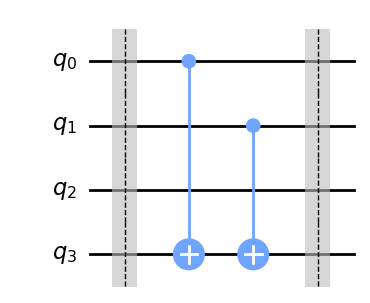

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qreg_q1 = QuantumRegister(4, 'q')

qc = QuantumCircuit(qreg_q1)

qc.barrier(qreg_q1[0], qreg_q1[1], qreg_q1[2], qreg_q1[3])
qc.cx(qreg_q1[0], qreg_q1[3])
qc.cx(qreg_q1[1], qreg_q1[3])
qc.barrier(qreg_q1[0], qreg_q1[1], qreg_q1[2], qreg_q1[3])
qc.draw()

Podemos comprobar que el oráculo cumple con la regla de correspondencia, como se muestra a continuación:
<center>
<img src="https://github.com/hipito123/Imagenes/blob/main/oracle.png?raw=true">

6.- En la construcción más simple posible de un oráculo balanceado, se utiliza la compuerta $CX$, la cual toma como objetivo el $(n+1)$-ésimo qubit del circuito y como control cada uno de los $n$ primeros qubits. Sin embargo, ¿es realmente necesario aplicar $CX$ a todos los $n$ primeros qubits, o podríamos prescindir de algunos y obtener igualmente un oráculo balanceado?

$\textit{Solucion:}$

Si se podría prescindir de algunos, como en el caso anterior, que fue un caso para $n=3$, donde se tomó como objetivo al qubit auxiliar (4to qubit) y sin embargo solo se aplicó $CX$ a 2 de los 3 qubits iniciales.

Sin embargo, para el caso de $n$ qubits, y en caso de no requerir una regla de correspondencia tan específica, podría bastar con una única compuerta $CX$, la cual sería controlada por el primer qubit. Esto se debe a que exactamente la mitad de todos los $2^{n}$ estados posibles empieza en $0$ y la otra mitad en $1$, de modo que si le asignamos al valor de la función $f(x)$ el valor del primer qubit (lo cual se logra implementado un $CX$ controlado por el primer qubit), ya tendríamos una funcion que asigne $0$ a la mitad de los estados y $1$ a la otra mitad, lo que corresponde a un oráculo balanceado

7.- Implemente el algoritmo de Grover para determinar la máxima cantidad de aristas en un grafo de 5 nodos y 6 aristas:

\begin{align}
(0,3)\\
(0,4)\\
(1,3)\\
(1,4)\\
(2,3)\\
(2,4)\\
\end{align}

$\textit{Solucion:}$

In [19]:
from qiskit.circuit.library import XGate,ZGate,C3XGate
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer

Incluiremos los indices de los qubits correspondientes a los nodos y las conexiones correspondientes a las aristas en 2 listas diferentes

In [7]:
nodos=[0,1,2,3,4]
aristas=[[0,3],[0,4],[1,3],[1,4],[2,3],[2,4]]

Empezamos definiendo las funciones necesarias para diseñar el circuito para el oráculo.

In [5]:
def oracle_part(qc,qr,nodos,aristas):

    target=len(nodos)
    for i in aristas:
        qc.cx(qr[i[0]],qr[target])
        qc.cx(qr[i[1]],qr[target])
        qc.barrier()
        target=target+1
    
    qc.cx(qr[5], qr[11])
    qc.barrier()
    qc.ccx(qr[6], qr[11], qr[12])
    qc.cx(qr[6], qr[11])
    qc.barrier()
    qc.ccx(qr[7], qr[11], qr[12])
    qc.cx(qr[7], qr[11])
    qc.barrier()
    qc.append(C3XGate(), [qr[8], qr[11], qr[12], qr[13]])
    qc.ccx(qr[8], qr[11], qr[12])
    qc.cx(qr[8], qr[11])
    qc.barrier()
    qc.append(C3XGate(), [qr[12], qr[9], qr[11], qr[13]])
    qc.ccx(qr[9], qr[11], qr[12])
    qc.cx(qr[9], qr[11])
    qc.barrier()
    qc.append(C3XGate(), [qr[12], qr[10], qr[11], qr[13]])
    qc.ccx(qr[10], qr[11], qr[12])
    qc.cx(qr[10], qr[11])
    qc.x(qr[11])
    qc.append(C3XGate(), [qr[11], qr[12], qr[13], qr[14]])
    
    return qc

def oracle(qc,qr,nodos,aristas):
    
    qc=oracle_part(qc,qr,nodos,aristas)
    qc1=qc.inverse()
    qc.z(qr[14])
    qc.compose(qc1,inplace=True)
    
    return qc


Luego definimos una funcion para añadir el operador difusión al circuito:

In [6]:
def grover_diffusion(qc,qr):
    mcz = ZGate().control(4)
    
    qc.barrier()
    qc.h(range(5))
    qc.x(range(5))
    qc.append(mcz,list(range(0,5)))
    qc.x(range(5))
    qc.h(range(5))
    qc.barrier()
    return qc

Luego, una funcion para unir el operador oráculo y el difusor:

In [8]:
def grover(qc,qr,nodos,aristas):
    return grover_diffusion(oracle(qc,qr,nodos,aristas),qr)

Ahora, definimos los registros y circuitos que utilizaremos y llamaremos a las funciones definidas anteriormente para terminar de componer el circutio final para el algoritmo de Grover

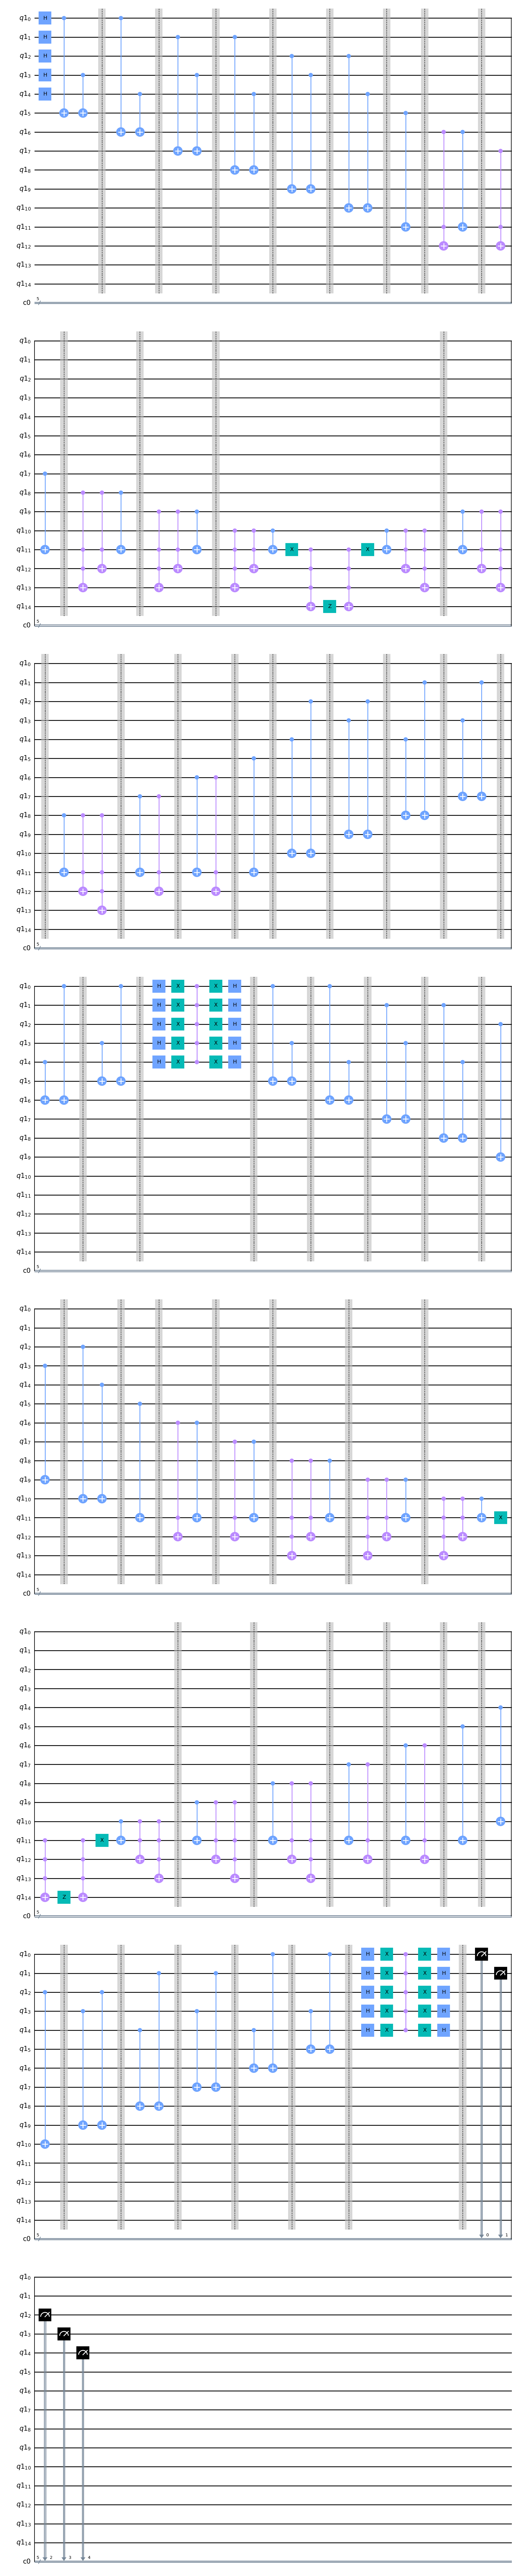

In [9]:
qr=QuantumRegister(15)
qc=QuantumCircuit(qr)

qra=QuantumRegister(15)
cra=ClassicalRegister(5)
qa=QuantumCircuit(qra,cra)
qa.h(range(5))

qb=grover(qc,qr,nodos,aristas)
qa.compose(qb.compose(qb),inplace=True)
qa.measure(range(5),cra)

qa.draw("mpl")

Finalmente, instanciamos el simulador `qasm` donde correremos el circuito final `qa`

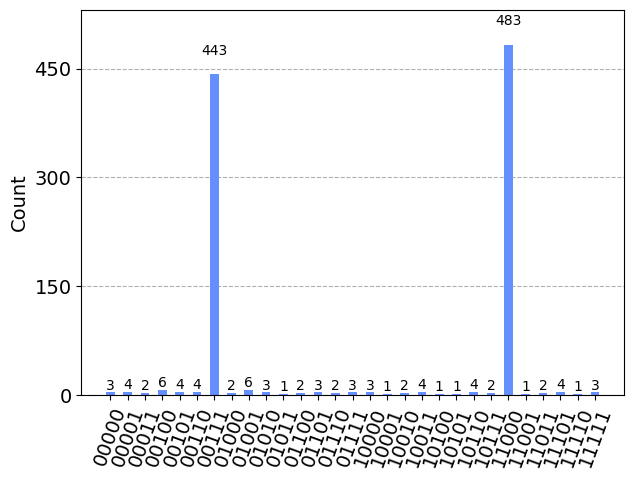

In [10]:
qasm_simulator = Aer.get_backend('qasm_simulator')
job = execute(qa, qasm_simulator, shots = 1000)
counts = job.result().get_counts(qa)

plot_histogram(counts)

Observamos que el estado con mayor probabilidad es $|00011\rangle$ (*), el cual es un estado correspondiente a 6 vértices totales correctos, el cual es el máximo número que podemos obtener.

Dicho estado correspondería a la siguiente coloración:
<center>
<img src="https://github.com/hipito123/Imagenes/blob/main/grover.png?raw=true">

(*) usando la convencion de los libros de texto

8.- En el algoritmo de Grover, determine el número de veces que debe ejercutarse el par $U_\omega U_f$ para que el estado final de nuestro circuito coincida con el Ket de estados deseados sabiendo que $x\in\{0,1\}^5$ y hay 4 estados que sastifacen las características de búsqueda.

$\textit{Solucion:}$

En el algoritmo de Grover, sabemos que el estado del sistema antes de ejecutarse el par $U_\omega U_f$, es $\ket{\psi_{1}}=H^{\otimes n}\ket{0}^{\otimes n}$ (en este caso, como $x\in\{0,1\}^5$, tenemos que $n=5$ )

Además se demostró que $$\ket{\psi_{1}}=\ket{s}=sin(\theta)\ket{A}+cos(\theta)\ket{B}$$ donde $sin(\theta)=\sqrt{ \frac{a}{2^{n}}} $ y $\cos\theta=\sqrt{\frac{b}{2^n}}$, siendo $a$ el número de estados deseados y $b$ el número de estados no deseados. En este caso tenemos que $a=4$ y $b=2^{5}-4=28$.

Tambien se comprobó en clase que luego de ejecutarse $k$ veces el par $U_\omega U_f$, el estado  $\ket{s}$ se transforma de la siguiente manera:
$$\ket{\psi_{f}}=R(2k\theta)\ket{s}=\sin (2k\theta+\theta)\ket{A}+\cos (2k\theta+\theta)\ket{B}$$

Por lo tanto, para obtener la máxima probabilidad en el estado $\ket{A}$, es necesario que:

$$2k\theta+\theta=\frac{\pi}{2}$$

de donde:

$$k=\frac{\pi}{4\theta}-\frac{1}{2}$$

Tenemos que $\theta=arcsin\left( \sqrt{\frac{a}{2^{n}}}\right)$ Reemplazando:


In [3]:
theta=np.arcsin(np.sqrt(4/32))

Luego, $k$ es igual a:

In [4]:
k=np.pi/(4*theta)-0.5
k

1.6734079041462837

Los números enteros más cercanos al resultado obtenido son 1 y 2, cuyas respectivas probabilidades para $\ket{A}$ son:

In [5]:
#k=1
p1=sin(3*theta)**2
#k=2
p2=sin(5*theta)**2
print("P_1: ",p1,"P_2: ",p2)

P_1:  0.7812500000000001 P_2:  0.9453124999999999


De donde concluimos que debemos ejecutar 2 veces el par $U_\omega U_f$  para obtener la maxima probabilidad en el estado deseado

Extra 1.- Si

\begin{align}
\ket{\psi3}&=U\omega\ket{\psi_2}\
&=\left(2\ket{s}\bra{s}-\mathbb{I}\right)\left(-\sqrt{\frac{a}{2^n}}\ket{A}+\sqrt{\frac{b}{2^n}}\ket{B}\right)
\end{align}

Usando
\begin{align}
\ket{s}\bra{s}=\frac{a}{2^n}\ket{A}\bra{A}+\frac{b}{2^n}\ket{B}\bra{B}+\frac{\sqrt{ab}}{2^n}\left[\ket{A}\bra{B}+\ket{B}\bra{A}\right]
\end{align}
\begin{align}
&\sin\theta=\sqrt{\frac{a}{2^n}}\
&\cos\theta=\sqrt{\frac{b}{2^n}}
\end{align}

Demuestre:
\begin{align}
\ket{\psi_3}=\sin 3\theta\ket{A}+\cos 3\theta\ket{B}
\end{align}

$\textit{Solucion:}$

Sea $\ket{\psi_{2}}=-\sin\theta\ket{A}+\cos\theta\ket{B}$

Tenemos, de la premisa, que $$\ket{\psi_{3}}=\left(2\ket{s}\bra{s}-\mathbb{I}\right)\ket{\psi_{2}}=\left(2\ket{s}\bra{s}-\mathbb{I}\right)(-\sin\theta\ket{A}+\cos\theta\ket{B})\hspace{1cm}(1)$$
Luego, aplicando el operador:
$$\ket{\psi_{3}}=2\ket{s}\bra{s}\psi_{2}\rangle-\ket{\psi_{2}}\hspace{7.85cm}(2)$$
Sabemos que $\ket{s}=sin(\theta)\ket{A}+cos(\theta)\ket{B}$. Luego:
\begin{align}
\bra{s}\psi_{2}\rangle&=\left\langle\hspace{0.2cm}sin(\theta)\ket{A}+cos(\theta)\ket{B}\hspace{0.2cm},\hspace{0.2cm}-\sin\theta\ket{A}+\cos\theta\ket{B}\hspace{0.2cm} \right\rangle\\
&=-\sin^{2}\theta+\cos^{2}\theta\hspace{7.79cm}(3)
\end{align}
Ya que $\ket{A}$ y $\ket{B}$ son estados ortonormales

Luego, de la eq(2) y eq(3):

\begin{align}
\ket{\psi_{3}}&=2(-\sin^{2}\theta+\cos^{2}\theta)(\sin\theta\ket{A}+\cos\theta\ket{B})+\ket{A}-\cos\theta\ket{B}\\
&=[2\sin\theta(\cos^{2}\theta-\sin^{2}\theta)+\sin\theta]\ket{A}+[2\cos\theta(\cos^{2}\theta-\sin^{2}\theta)-cos\theta]\ket{B}\\
&=(3\sin\theta-4\sin^{3}\theta)\ket{A}+(4\cos^{3}\theta-3\cos\theta)\ket{B}\\
\ket{\psi_{3}}&=sin3\theta\ket{A}+\cos3\theta\ket{B}\\
\end{align}



## Clase 6:

9.- La implementación de QFT se probó preparando el estado de Fourier $|\widetilde{5}\rangle$ para el cual $\text{QFT}^{\dagger}|\widetilde{5}\rangle= |101\rangle$. Intenta encontrar el estado $|a\rangle$ tal que $\text{QFT}^{\dagger}|a\rangle = |100\rangle$.

In [2]:
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

ModuleNotFoundError: No module named 'qiskit.providers.ibmq'

In [4]:
def qft_rotations(circuit, n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)

In [5]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

In [6]:
def inverse_qft(circuit, n):
    qft_circ = qft(QuantumCircuit(n), n)
    invqft_circ = qft_circ.inverse()
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose()

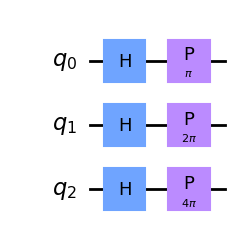

In [33]:
nqubits = 3
number = 4
qc3 = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc3.h(qubit)
qc3.p(number*pi/4,0)
qc3.p(number*pi/2,1)
qc3.p(number*pi,2)

qc3.draw()

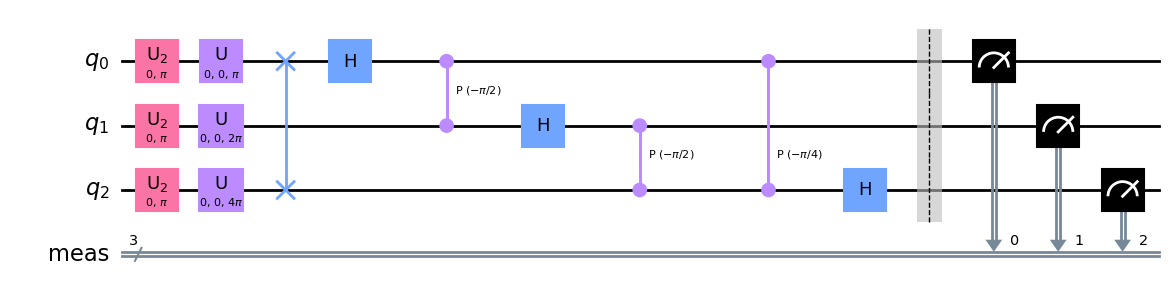

In [34]:
qc4 = inverse_qft(qc3, nqubits)
qc4.measure_all()
qc4.draw()

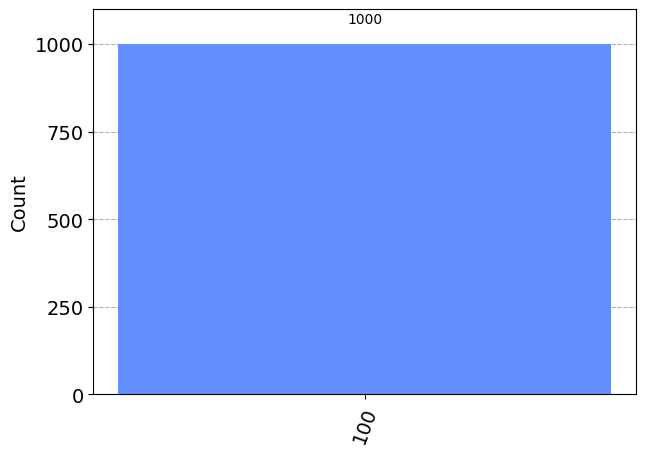

In [35]:
qasm_simulator = Aer.get_backend('qasm_simulator')
job = execute(qc4, qasm_simulator, shots = 1000)
counts = job.result().get_counts(qc4)

plot_histogram(counts)

10.- Encuentra el estado $|b\rangle$ tal que $\text{QFT}^{\dagger}|b\rangle = |011\rangle$.

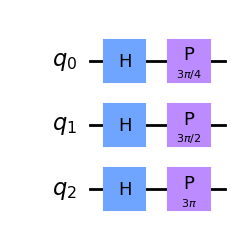

In [28]:
nqubits = 3
number = 3
qc5 = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc5.h(qubit)
qc5.p(number*pi/4,0)
qc5.p(number*pi/2,1)
qc5.p(number*pi,2)

qc5.draw()

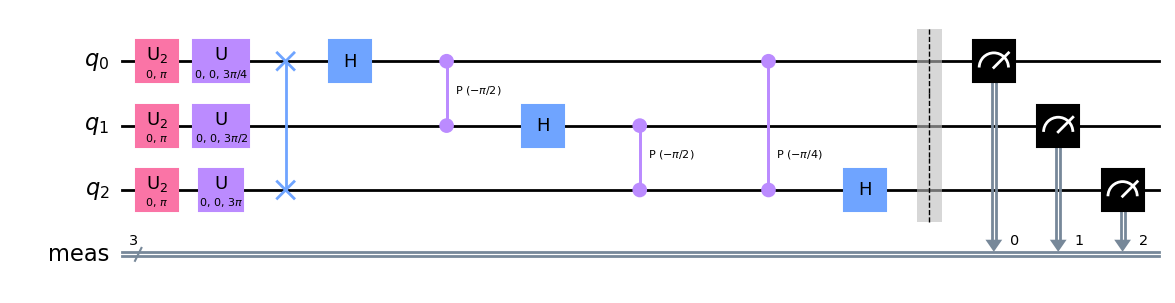

In [29]:
qc6 = inverse_qft(qc5, nqubits)
qc6.measure_all()
qc6.draw()

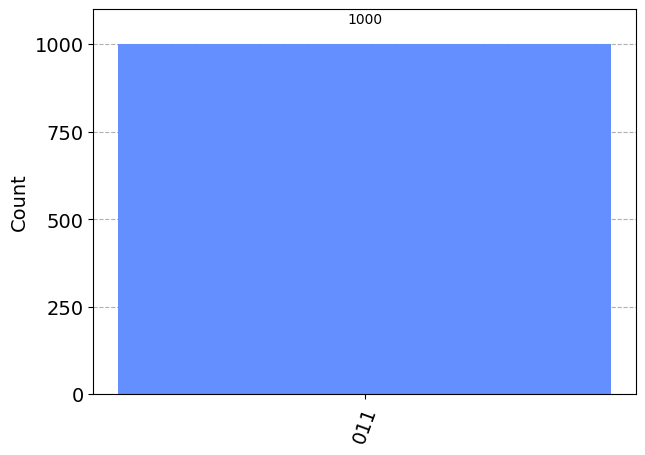

In [30]:
qasm_simulator = Aer.get_backend('qasm_simulator')
job = execute(qc6, qasm_simulator, shots = 1000)
counts = job.result().get_counts(qc6)

plot_histogram(counts)

Extra 3. Intente escribir la función QFT sin recursividad. Utilice el simulador unitario de Qiskit para verificar sus resultados.

In [15]:
def qft_2(circuit):
    n=circuit.num_qubits
    for k in range(n):
        pos=(n-1)-k
        circuit.h(pos)
        for l in range(pos): circuit.cp(pi/2**(pos-l),l,pos)
    
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

Comprobamos resultados

In [14]:
nqubits = 3
number = 3
qc9 = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc9.h(qubit)
qc9.p(number*pi/4,0)
qc9.p(number*pi/2,1)
qc9.p(number*pi,2)

qc9.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤ P(3π/4) ├
     ├───┤├─────────┤
q_1: ┤ H ├┤ P(3π/2) ├
     ├───┤└┬───────┬┘
q_2: ┤ H ├─┤ P(3π) ├─
     └───┘ └───────┘

In [16]:
def inverse_qft(circuit, n):
    qft_circ = qft_2(QuantumCircuit(n))
    invqft_circ = qft_circ.inverse()
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() 

In [17]:
qc10 = inverse_qft(qc9, nqubits)
qc10.measure_all()
qc10.draw()

┌─────────┐┌─────────────┐   ┌───┐                                   »
   q_0: ┤ U2(0,π) ├┤ U(0,0,3π/4) ├─X─┤ H ├─■────────────────────────■────────»
        ├─────────┤├─────────────┤ │ └───┘ │P(-π/2) ┌───┐           │        »
   q_1: ┤ U2(0,π) ├┤ U(0,0,3π/2) ├─┼───────■────────┤ H ├─■─────────┼────────»
        ├─────────┤└┬───────────┬┘ │                └───┘ │P(-π/2)  │P(-π/4) »
   q_2: ┤ U2(0,π) ├─┤ U(0,0,3π) ├──X──────────────────────■─────────■────────»
        └─────────┘ └───────────┘                                            »
meas: 3/═════════════════════════════════════════════════════════════════════»
                                                                             »
«              ░ ┌─┐      
«   q_0: ──────░─┤M├──────
«              ░ └╥┘┌─┐   
«   q_1: ──────░──╫─┤M├───
«        ┌───┐ ░  ║ └╥┘┌─┐
«   q_2: ┤ H ├─░──╫──╫─┤M├
«        └───┘ ░  ║  ║ └╥┘
«meas: 3/═════════╩══╩══╩═
«                 0  1  2

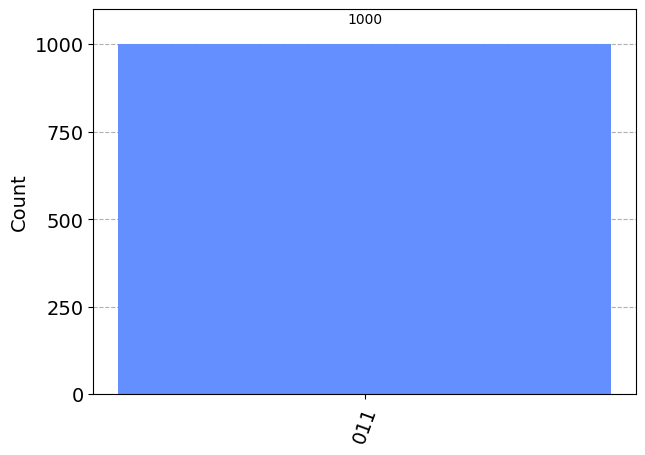

In [20]:
qasm_simulator = Aer.get_backend('qasm_simulator')
job = execute(qc10, qasm_simulator, shots = 1000)
counts = job.result().get_counts(qc10)

plot_histogram(counts)